In [21]:
import oss2
import json
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
with open("../aliyun_key.json" ,'r') as key:
    AccessKeyDict=json.loads(key.read())
AccessKeyId=AccessKeyDict["AccessKeyId"]
AccessKeySecret=AccessKeyDict["AccessKeySecret"]
auth = oss2.Auth(AccessKeyId, AccessKeySecret)
bucket = oss2.Bucket(auth, 'https://oss-cn-shanghai.aliyuncs.com', 'ocr-yjs')
from aliyunsdkcore.client import AcsClient
from aliyunsdkcore.acs_exception.exceptions import ClientException
from aliyunsdkcore.acs_exception.exceptions import ServerException
from aliyunsdkcore.auth.credentials import AccessKeyCredential
from aliyunsdkcore.auth.credentials import StsTokenCredential
credentials = AccessKeyCredential(AccessKeyId, AccessKeySecret)
client = AcsClient(region_id='cn-shanghai', credential=credentials)
import seaborn as sns

In [22]:
"""

https://help.aliyun.com/document_detail/159214.html
手势关键点检测
HandPosture可以获取手势的二十一个关键点信息。
"""

from aliyunsdkfacebody.request.v20191230.HandPostureRequest import HandPostureRequest

request = HandPostureRequest()
request.set_accept_format('json')

filepath="images/手掌.jpg"
with open(filepath, 'rb') as fileobj:
    bucket.put_object(filepath, fileobj)
url="https://ocr-yjs.oss-cn-shanghai.aliyuncs.com/"+filepath
request.set_ImageURL(url)

response = client.do_action_with_exception(request)
response=json.loads(str(response, encoding='utf-8'))
print(response)

{'RequestId': '78DC25B8-4675-58C5-B2CD-2B4063BE1BF1', 'Data': {'MetaObject': {'Height': 478, 'Width': 850}, 'Outputs': [{'Results': [{'Hands': {'Confident': 1, 'KeyPoints': [{'Label': '0', 'Positions': [{'Points': [0.4750716984272003, 0.7935550808906555]}]}, {'Label': '1', 'Positions': [{'Points': [0.41993096470832825, 0.712688148021698]}]}, {'Label': '2', 'Positions': [{'Points': [0.3470659554004669, 0.601658284664154]}]}, {'Label': '3', 'Positions': [{'Points': [0.30989059805870056, 0.46409955620765686]}]}, {'Label': '4', 'Positions': [{'Points': [0.27792635560035706, 0.364242821931839]}]}, {'Label': '5', 'Positions': [{'Points': [0.42169979214668274, 0.45184677839279175]}]}, {'Label': '6', 'Positions': [{'Points': [0.4230223298072815, 0.28472110629081726]}]}, {'Label': '7', 'Positions': [{'Points': [0.4261426627635956, 0.17738473415374756]}]}, {'Label': '8', 'Positions': [{'Points': [0.43028169870376587, 0.07360294461250305]}]}, {'Label': '9', 'Positions': [{'Points': [0.47580131888

In [23]:
MetaObject=response['Data']['MetaObject']
MetaObject # 图片基本信息。

{'Height': 478, 'Width': 850}

In [24]:
Outputs=response['Data']['Outputs'][0]['Results'][0]
KeyPoints=Outputs['Hands']['KeyPoints']


In [25]:
HandCount=Outputs['Hands']["Confident"]
HandCount # 手掌的个数。

1

In [26]:
width=MetaObject['Width']
height=MetaObject['Height']

In [27]:
Box=Outputs["Box"]['Positions']
BoxConfident=Outputs["Box"]['Confident']


[ [int(i[0]*width),int(i[1]*height)] for i in [pts["Points"] for pts in Box]]

[[243, 5], [545, 5], [545, 401], [243, 401]]

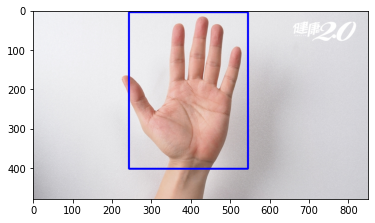

In [28]:
# height=MetaObject['Height']
# width=MetaObject['Width']
# left=(int(Box[0]['Points']*height),int(Box[1]['Points']*width))
# bottom=(int(Box[2]['Points']*height),int(Box[3]['Points']*width))
points=np.array([ [int(i[0]*width),int(i[1]*height)] for i in [pts["Points"] for pts in Box]],np.int32)
points.reshape((-1,1,2))
res=cv2.polylines(img=plt.imread(filepath), pts=[points], isClosed=True, color=(0,0,255), thickness=3)
plt.imshow(res)


In [29]:
Positions=[ (int(e[0]*width),int(e[1]*height)) for e in [j['Points'] for j in [ i[0] for i in [Positions["Positions"] for Positions in  KeyPoints]]]]
Positions[0]

(403, 379)

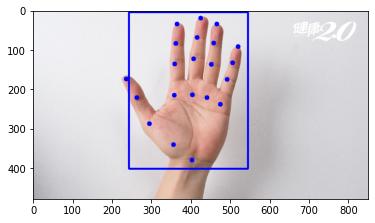

In [30]:
for i in range(len(Positions)):
    res=cv2.circle(res,Positions[i],6, (0,0,255),-1)
plt.imshow(res)

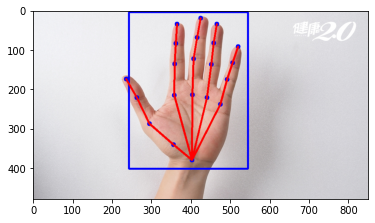

In [50]:
# 手指1
cv2.line(res, Positions[0], Positions[1], (255,0,0),4)
cv2.line(res, Positions[1], Positions[2], (255,0,0),4)
cv2.line(res, Positions[2], Positions[3], (255,0,0),4)
cv2.line(res, Positions[3], Positions[4], (255,0,0),4)
# 手指2
color2=(255,0,0)
cv2.line(res, Positions[0], Positions[5], color2,4)
cv2.line(res, Positions[5], Positions[6], color2,4)
cv2.line(res, Positions[6], Positions[7], color2,4)
cv2.line(res, Positions[7], Positions[8], color2,4)
# 手指3
color2=(255,0,0)
cv2.line(res, Positions[0], Positions[9], color2,4)
cv2.line(res, Positions[9], Positions[10], color2,4)
cv2.line(res, Positions[10], Positions[11], color2,4)
cv2.line(res, Positions[11], Positions[12], color2,4)

# 手指4
color2=(255,0,0)
cv2.line(res, Positions[0], Positions[13], color2,4)
cv2.line(res, Positions[13], Positions[14], color2,4)
cv2.line(res, Positions[14], Positions[15], color2,4)
cv2.line(res, Positions[15], Positions[16], color2,4)

# 手指5
color2=(255,0,0)
cv2.line(res, Positions[0], Positions[17], color2,4)
cv2.line(res, Positions[17], Positions[18], color2,4)
cv2.line(res, Positions[18], Positions[19], color2,4)
cv2.line(res, Positions[19], Positions[20], color2,4)

plt.imshow(res)

In [52]:
from PIL import Image
im = Image.fromarray(res)
im.save("images/手势关键点检测.jpg")